In [9]:
#### Importing the necessary libraries.


#install.packages("tidyverse")
library(tidyverse)


#install.packages("rebus")
library(rebus)



In [10]:
academic <- read_csv("/Users/sharadraina/Desktop/archive/Project_01/academic.csv" , show_col_types = FALSE)

head(academic,5)

year,students,us_students,undergraduate,graduate,non_degree,opt
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1948/49,25464,2403400,NA,NA,NA,NA
1949/50,26433,2445000,NA,NA,NA,NA
1950/51,29813,2281000,NA,NA,NA,NA
1951/52,30462,2102000,NA,NA,NA,NA
1952/53,33675,2134000,NA,NA,NA,NA


In [11]:
#Performing basic checks using glimpse and summary function.

glimpse(academic)

# The dataset has 75 rows and 7 columns.

# A lot of NA values and datatype of the year column needs to be changed.



Rows: 75
Columns: 7
$ year          <chr> "1948/49", "1949/50", "1950/51", "1951/52", "1952/53", "…
$ students      <dbl> 25464, 26433, 29813, 30462, 33675, 33833, 34232, 36494, …
$ us_students   <dbl> 2403400, 2445000, 2281000, 2102000, 2134000, 2231000, 24…
$ undergraduate <dbl> NA, NA, NA, NA, NA, NA, 19101, NA, NA, NA, NA, 25164, NA…
$ graduate      <dbl> NA, NA, NA, NA, NA, NA, 12118, NA, NA, NA, NA, 18910, NA…
$ non_degree    <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, …
$ opt           <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, …


In [12]:
summary(academic)

#This gives you an idea of the minimum and maximum students from various academic levels across 70 years.

#Missing values for each column.

     year              students        us_students       undergraduate   
 Length:75          Min.   :  25464   Min.   : 2102000   Min.   : 19101  
 Class :character   1st Qu.: 105288   1st Qu.: 7882000   1st Qu.:189900  
 Mode  :character   Median : 343777   Median :12635500   Median :235802  
                    Mean   : 396112   Mean   :12327496   Mean   :243060  
                    3rd Qu.: 577746   3rd Qu.:17325750   3rd Qu.:291439  
                    Max.   :1095299   Max.   :21253000   Max.   :442746  
                                      NA's   :3          NA's   :26      
    graduate        non_degree         opt        
 Min.   : 12118   Min.   :16850   Min.   :  2840  
 1st Qu.:146100   1st Qu.:21900   1st Qu.:  8100  
 Median :211426   Median :30581   Median : 23801  
 Mean   :224228   Mean   :38367   Mean   : 60032  
 3rd Qu.:296574   3rd Qu.:52560   3rd Qu.: 87598  
 Max.   :467027   Max.   :93587   Max.   :223539  
 NA's   :26       NA's   :31      NA's   :31      

In [13]:
#Year column is written as "1948/49" meaning the number of students for the year of 1948. 
#This can be written as "1948" explaining the number of admissions that took place for the year 1948.

#I am using str_replace function to correct the column values and will then change it to correct data type.

library(stringr)

library(rebus)


  patt = "/" %R%  DGT %R%  DGT
  
   academic$year  <-str_replace(academic$year  , pattern = patt , replacement = "")
  
    
# Converting year column into numeric datatype and extracting year values for each date and overwriting it with the year column in the dataset.
   
academic$year <-  year(as.Date(academic$year , format = "%Y"))

academic$year

[1] 1948 1949 1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962
[16] 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977
[31] 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992
[46] 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007
[61] 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022

In [14]:
#### Subsetting data to get all observations post 2000.

academic  <- academic[academic$year >= 2000, ]

head(academic)

year,students,us_students,undergraduate,graduate,non_degree,opt
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2000,547867,15312000,254429,238497,33883,21058
2001,582996,15928000,261079,264749,34423,22745
2002,586323,16612000,260103,267876,30551,27793
2003,572509,16911000,248200,274310,20659,29340
2004,565039,17272000,239212,264410,28418,32999
2005,564766,17487000,236342,259717,30611,38096


In [15]:
#### Checking if the data has NA values


sum(is.na(academic))

[1] 0

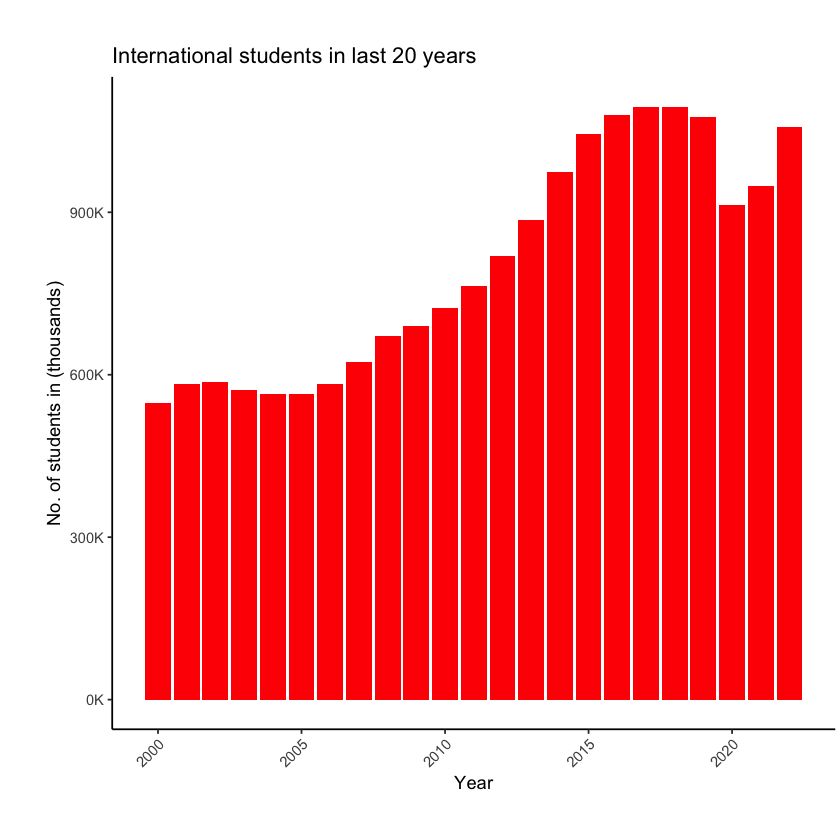

In [16]:
#### Trend showing no. of international students getting admitted into U.S universities for the past 20 years.


academic %>%
  
  ggplot(aes(year , students / 1000)) +
  
  geom_bar(stat = "identity" , fill = "red") +
  
 scale_y_continuous(labels = function(x) paste0(x , "K")) +
  
  labs(title = "International students in last 20 years" , 
       
       y = "No. of students in (thousands)" , 
       
       x = "Year") +
  
  theme_classic() +
  
  theme(axis.text.x  = element_text(angle = 45 , hjust = 1) , plot.margin = unit(c(1, 0.1, 1, 1), "cm"))

In [17]:
##### This shows an upward trend in the number of international students taking admissions into U.S universities in the past 20 years. There is a significant dip for the years 2019-2020 and that can be attributed to the nationwide lockdowns that happened during the times of COVID.


##### Since 2000 till 2020 the percentage of international students in U.S universities has grown by 50% which shows the increasing trend in globalization of education.

#####  The surge in international students in U.S. universities, possibly driven by superior education and economic prospects, signals a need for other countries to enhance their education systems to retain their talent pool. Policymakers can leverage this data to formulate effective strategies for international students, considering their potential impact on the U.S. workforce. Furthermore, the data can shed light on the retention of international graduates within the U.S., influencing discussions on post-graduation career paths.





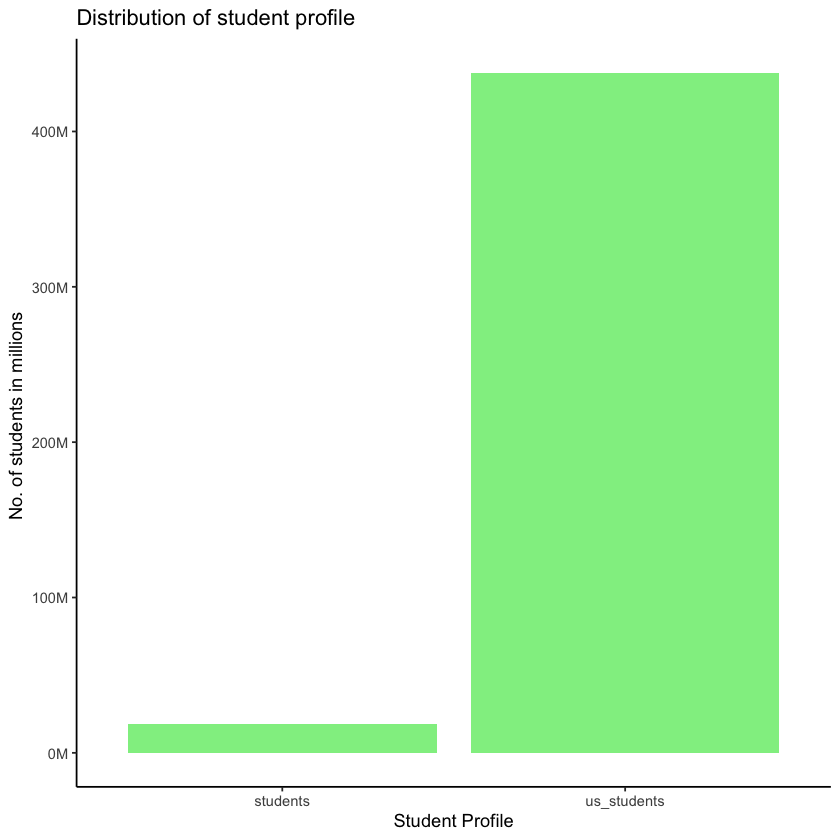

In [18]:
#### Distribution of international and students residing in U.S


pivot_longer(academic , cols = c("students" , "us_students") , names_to = "Type" , values_to = "number") %>%
  
  select(Type , number) %>%
  
  ggplot(aes(Type , number / 1000000)) +
  
  geom_bar(stat = "identity" , fill = "lightgreen") +
  
   scale_y_continuous(labels = function(x) paste0(x , "M")) +
  
  labs(title = "Distribution of student profile" , 
       
       x = "Student Profile" , 
       
       y = "No. of students in millions ") +
  
  theme_classic()

In [19]:
##### As we can see in the graph, and I suppose this was also my thought before showing it to you, 
##### in the United States there is only a small percentage of international students compared to the total number of students studying there. 
##### Though the percentage increase in past 20 years has been close to 50% but that is very small as compared to the local student population.



In [20]:
#### This dataset gives information on the origin of students in terms of there country of origin as well as there chosen academic type.

origin <- read_csv("/Users/sharadraina/Desktop/archive/Project_01/origin.csv" , show_col_types = FALSE)

head(origin)

year,origin_region,origin,academic_type,students
<chr>,<chr>,<chr>,<chr>,<dbl>
2000/01,"Africa, Subsaharan","Africa, Subsaharan, Unspecified",Graduate,2
2000/01,"Africa, Subsaharan","Africa, Subsaharan, Unspecified",Other,0
2000/01,"Africa, Subsaharan","Africa, Subsaharan, Unspecified",Undergraduate,6
2000/01,Asia,"Asia, Unspecified",Graduate,0
2000/01,Asia,"Asia, Unspecified",Other,6
2000/01,Asia,"Asia, Unspecified",Undergraduate,0


In [21]:
#### Tidying the Year column.

 patt = "/" %R% DGT %R% DGT
  
   origin$year  <-str_replace(origin$year  , pattern = patt , replacement = "")
  
    
# Converting year column into numeric datatype and extracting year values for each date and overwriting it with the year column in the dataset.
   
origin$year <-  year(as.Date(origin$year , format = "%Y"))



pattern1 <-   "," %R% SPC %R% one_or_more(WRD) %R% optional(",") %R% optional(SPC)  %R% optional(one_or_more(WRD)) %R% END

origin$origin <- str_replace(origin$origin , pattern = pattern1 , replacement = "" )

head(origin,10)

year,origin_region,origin,academic_type,students
<dbl>,<chr>,<chr>,<chr>,<dbl>
2000,"Africa, Subsaharan","Africa, Subsaharan",Graduate,2
2000,"Africa, Subsaharan","Africa, Subsaharan",Other,0
2000,"Africa, Subsaharan","Africa, Subsaharan",Undergraduate,6
2000,Asia,Asia,Graduate,0
2000,Asia,Asia,Other,6
2000,Asia,Asia,Undergraduate,0
2000,Caribbean,Anguilla,Graduate,5
2000,Caribbean,Anguilla,Other,1
2000,Caribbean,Anguilla,Undergraduate,59


`summarise()` has grouped output by 'year'. You can override using the
`.groups` argument.


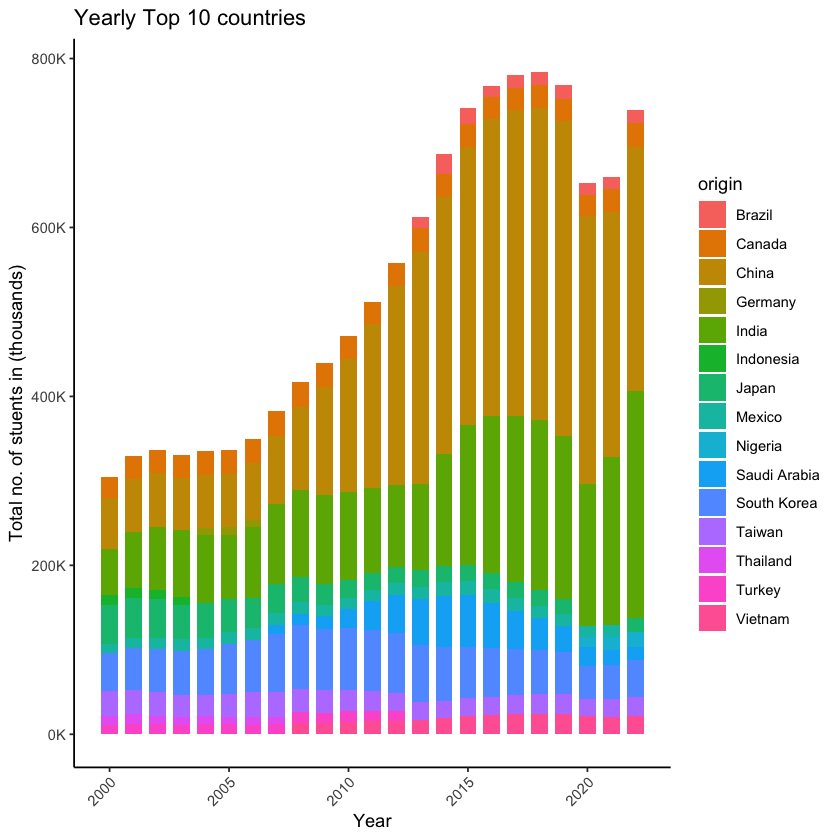

In [22]:
  a <- origin %>%
  
  group_by(year , origin) %>%
  
  summarise(Total_students = sum(students)) %>%
  
  slice_max( order_by = Total_students , n = 10 ) 
  
  
   
  ggplot( a, aes(year , Total_students / 1000 , fill = origin)) +
  
  scale_y_continuous(labels = function(x) paste0(x , "K")) + 
  
  geom_bar(stat = "identity"  , width = 0.7) +
  
  theme_classic() + 
  
  theme(axis.text.x  = element_text(angle = 45 , hjust = 1)) +
  
  labs(title = "Yearly Top 10 countries" , x = "Year" , y = "Total no. of stuents in (thousands)")

In [23]:

##### The above graph is drawn to highlight the top 10 (per year) countries of origin of international students studying in U.S.A. 
##### As clearly evident, in the past 20 years maximum students have come from China followed by India and Saudi Arabia. 
##### So the maaximum contribution has come from Asia followed by Middle Eastern countries. 
##### This also provides information on the cultural diversity that can be expected in U.S universities.


In [24]:
#### This is a live animation of how the metrics for the number of student admissions have changed in the past 20 years in U.S universities.

library(gganimate)

   origin %>%
  
  group_by(year , origin , academic_type) %>%
  
  summarise(Total_students = sum(students)) %>%
  
  slice_max( order_by = Total_students , n = 10 ) %>%
  
  
   
  ggplot( aes(academic_type , Total_students / 1000 )) +
  
  scale_y_continuous(labels = function(x) paste0(x , "K")) + 
  
  geom_bar(stat = "identity"  , width = 0.7 , fill = "red") +
    
     theme_classic() +
     
  
  theme( axis.text.x = element_text(angle = 30 , hjust = 1 , size = 12 ) ) +
  
labs(title = 'Year: {frame_time}', x = 'Academic Type', y = 'Total Students') +
     
  transition_time(year) +
     
  ease_aes('linear')

`summarise()` has grouped output by 'year', 'origin'. You can override using
the `.groups` argument.

Rendering [===>-----------------------------------------] at 36 fps ~ eta:  3s

Rendering [====>----------------------------------------] at 36 fps ~ eta:  2s

Rendering [====>----------------------------------------] at 35 fps ~ eta:  3s

Rendering [=====>---------------------------------------] at 35 fps ~ eta:  2s

Rendering [======>--------------------------------------] at 35 fps ~ eta:  2s

Rendering [=======>-------------------------------------] at 35 fps ~ eta:  2s

Rendering [========>------------------------------------] at 35 fps ~ eta:  2s

Rendering [========>------------------------------------] at 34 fps ~ eta:  2s

Rendering [========>------------------------------------] at 35 fps ~ eta:  2s

Rendering [=========>-----------------------------------] at 35 fps ~ eta:  2s

Rendering [==========>----------------------------------] at 34 fps ~ eta:  2s

Rendering [=======

In [25]:
#install.packages("maps")
#install.packages("plotly")
#install.packages("ggzoom")

In [ ]:
library(maps)
#library(ggzoom)

library(maps)
library(dplyr)
library(plotly)


# Load world map data
world <- map_data("world")

# Merge world map data with the 'a' data frame
map_data <- merge(world, a, by.x = "region", by.y = "origin", all.x = TRUE)

# Create the map with plotly
interactive_map <- ggplotly(
  ggplot(map_data, aes(x = long, y = lat, group = group, fill = Total_students)) +
    geom_polygon(color = "white", size = 0.1) +
    scale_fill_gradient(low = "lightblue", high = "darkblue", name = "Total Students") +
    theme_minimal() +
    #facet_wrap(~year, scales = "free") +
    labs(title = "Top 10 Countries of Origin for Students (per Year)",
         fill = "Total Students")
)

# Show the interactive map
interactive_map



In [26]:
##### This is a world map view of the same information presented in a differnet way. Here it is easily evident the continents that have contributed to the U.S universities.


In [27]:

#### Tidying the year column.

library(tidyverse)
academic_details <- read_csv("/Users/sharadraina/Desktop/archive/Project_01/academic_detail.csv" )


#head(academic_details)


library(stringr)

library(rebus)


  patt = "/" %R% DGT %R% DGT
  
   academic_details$year  <-str_replace(academic_details$year  , pattern = patt , replacement = "")
  
    
# Converting year column into numeric datatype and extracting year values for each date and overwriting it with the year column in the dataset.
   
academic_details$year <-  year(as.Date(academic_details$year , format = "%Y"))

academic_details$year


academic_details  <- academic_details[academic_details$year >= 2000, ]

head(academic_details)

Rows: 216 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): year, academic_type, academic_level
dbl (1): students

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] 1999 1999 1999 1999 1999 1999 1999 1999 1999 2000 2000 2000 2000 2000 2000
 [16] 2000 2000 2000 2001 2001 2001 2001 2001 2001 2001 2001 2001 2002 2002 2002
 [31] 2002 2002 2002 2002 2002 2002 2003 2003 2003 2003 2003 2003 2003 2003 2003
 [46] 2004 2004 2004 2004 2004 2004 2004 2004 2004 2005 2005 2005 2005 2005 2005
 [61] 2005 2005 2005 2006 2006 2006 2006 2006 2006 2006 2006 2006 2007 2007 2007
 [76] 2007 2007 2007 2007 2007 2007 2008 2008 2008 2008 2008 2008 2008 2008 2008
 [91] 2009 2009 2009 2009 2009 2009 2009 2009 2009 2010 2010 2010 2010 2010 2010
[106] 2010 2010 2010 2011 2011 2011 2011 2011 2011 2011 2011 2011 2012 2012 2012
[121] 2012 2012 2012 2012 2012 2012 2013 2013 2013 2013 2013 2013 2013 2013 2013
[136] 2014 2014 2014 2014 2014 2014 2014 2014 2014 2015 2015 2015 2015 2015 2015
[151] 2015 2015 2015 2016 2016 2016 2016 2016 2016 2016 2016 2016 2017 2017 2017
[166] 2017 2017 2017 2017 2017 2017 2018 2018 2018 2018 2018 2018 2018 2018 2018
[181] 2019 2019 2019 2019 2019 2019 2019 2019 2019 2020 2020 2020 2020 2020 2020
[196] 2020 2020 2020 2021 2021 2021 2021 2021 2021 2021 2021 2021 2022 2022 2022
[211] 2022 2022 2022 2022 2022 2022

year,academic_type,academic_level,students
<dbl>,<chr>,<chr>,<dbl>
2000,Undergraduate,Associate's,67493
2000,Undergraduate,Bachelor's,186936
2000,Graduate,Master's,123920
2000,Graduate,Doctoral,77211
2000,Graduate,Professional,8005
2000,Graduate,"Graduate, Unspecified",29361


`summarise()` has grouped output by 'year'. You can override using the
`.groups` argument.


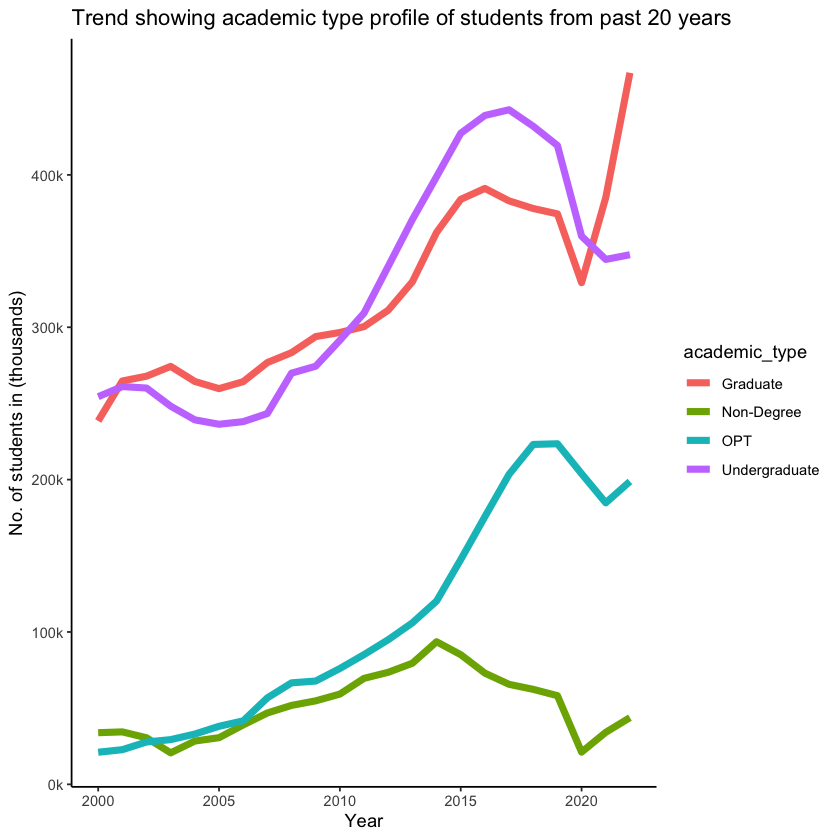

In [28]:
academic_details %>%
  
  group_by(year , academic_type) %>%
  
  summarise(Total_students = sum(students)) %>%
  
  ggplot(aes(year , Total_students / 1000 , color = academic_type )) +
  
  scale_y_continuous( labels = function(x) paste0( x , "k")) + 
  
   theme_classic() +
  
  theme(panel.background = element_rect(fill = "white")) + 
  
  geom_line(size = 2) + 
  
  labs(title = "Trend showing academic type profile of students from past 20 years" , 
       
       x = "Year" , y = "No. of students in (thousands)")


In [29]:
##### The number of graduate and undergraduate students have always been high as compared to non-degree and OPT students. 
##### After year 2010 the number of students coming to pursue bachelors has surpassed the number of students for masters.


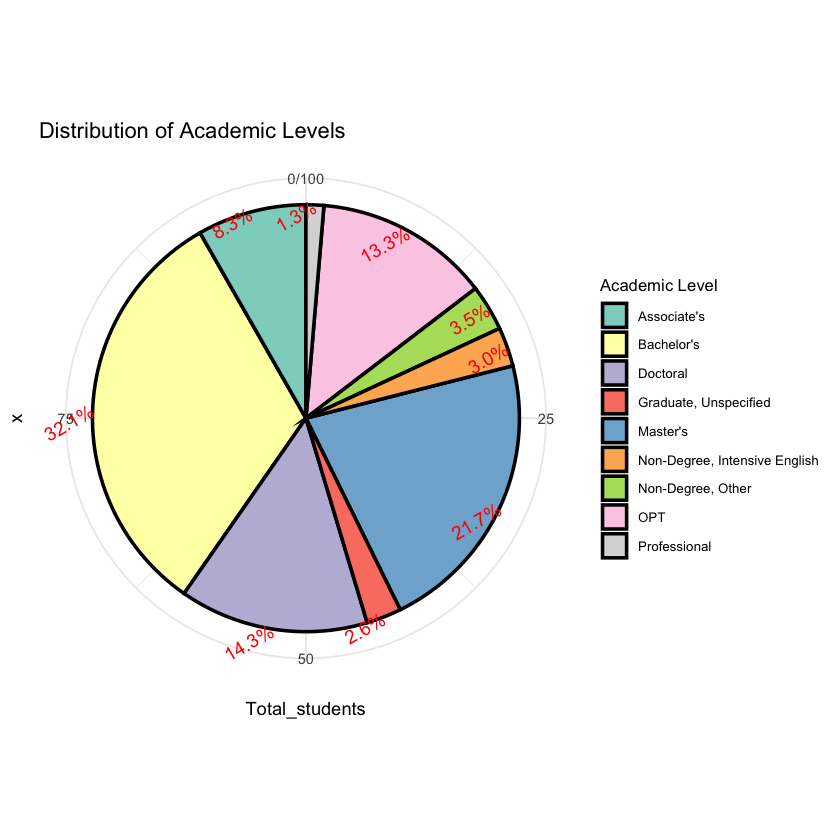

In [30]:
library(ggplot2)

academic_details %>%
  
  select(year, academic_level, students) %>%
  
  group_by(academic_level) %>%
  
  summarise(Total_students = sum(students) / sum(academic_details$students) * 100) %>%
  
  arrange(desc(Total_students)) %>%
  
  ggplot(aes(x = "", y = Total_students, fill = academic_level, 
             
             label = sprintf("%.1f%%", Total_students))) +
  
  geom_bar(stat = "identity", width = 1, color = "black", size = 1) +
  
  coord_polar("y") +
  
  geom_text(aes(x = 1.5, label = sprintf("%.1f%%", Total_students)), 
            
            position = position_stack(vjust = 0.5), color = "red", size = 4, angle = 30, hjust = 1) +
  
  scale_fill_brewer(palette = "Set3") +
  
  theme_minimal() +
  
  theme(legend.position = "right") +
  
  labs(title = "Distribution of Academic Levels", fill = "Academic Level") +
  
  theme(legend.title = element_text(size = 10), legend.text = element_text(size = 8))


In [31]:
##### Most of the students are from Bachelor's (32.1%) and Master's (21.7%) followed by Doctoral (14.3%) and OPT (13.3%).


In [32]:
#install.packages("gganimate")

library(gganimate)
library(ggplot2)

#install.packages("gifski")

#install.packages("gapminder")
library(gifski)

In [33]:
#### This is the live animation showing growth in different academic types maongst international students in U.S.


q <- merge(academic_details , origin , by = "year" ) %>%
  
  ggplot(aes( academic_level, students.x / 1000,color = origin)) +
  
  scale_y_continuous(labels = function(x)  paste0( x , "K")) +
  
  geom_bar(stat = "identity") +
  
  
  transition_time(year) +
  
  ease_aes('linear') +

  
  
   labs(title = 'Year: {frame_time}', x = 'Academic Levels', y = 'Total Students') +

  
  
  theme_classic() +
  
  theme(legend.position = "none" , axis.text.x = element_text(angle = 30 , hjust = 1 , size = 12 ) )
  


q


Rendering [=>-------------------------------------------] at 18 fps ~ eta:  5s

Rendering [==>------------------------------------------] at 18 fps ~ eta:  5s

Rendering [===>-----------------------------------------] at 18 fps ~ eta:  5s

Rendering [====>----------------------------------------] at 18 fps ~ eta:  5s

Rendering [=====>---------------------------------------] at 18 fps ~ eta:  5s

Rendering [======>--------------------------------------] at 18 fps ~ eta:  5s

Rendering [=======>-------------------------------------] at 18 fps ~ eta:  5s

Rendering [=======>-------------------------------------] at 18 fps ~ eta:  4s

Rendering [========>------------------------------------] at 18 fps ~ eta:  4s

Rendering [=========>-----------------------------------] at 18 fps ~ eta:  4s

Rendering [==========>----------------------------------] at 18 fps ~ eta:  4s

Rendering [===========>---------------------------------] at 18 fps ~ eta:  4s

Rendering [============>---------------

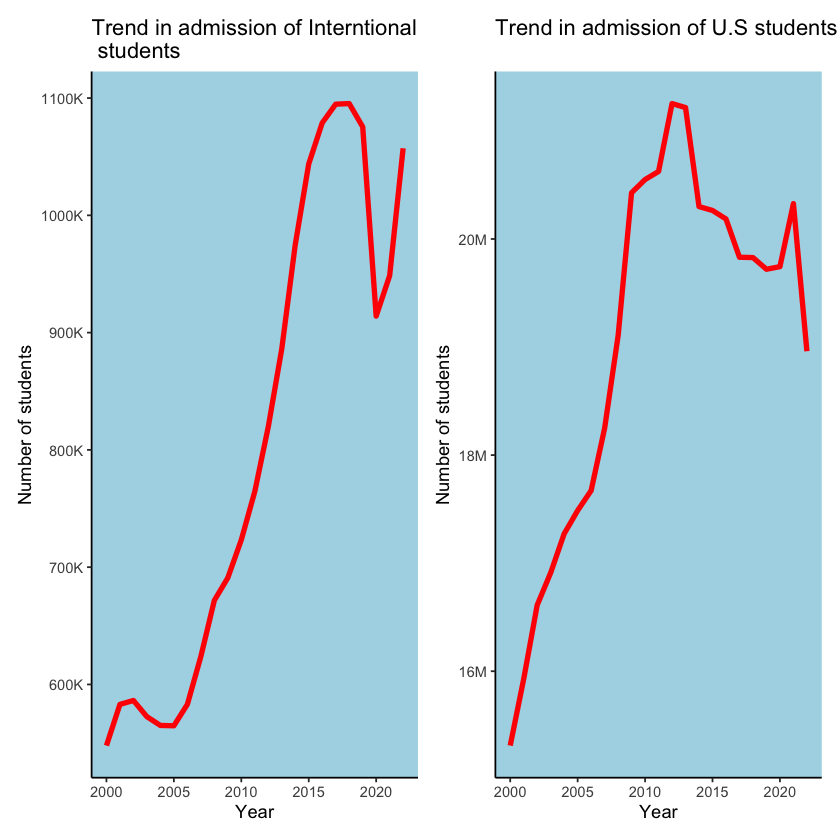

In [34]:
a <- academic %>%
  
  ggplot(aes(year , students / 1000 )) +
  
  geom_line(size = 1.5 , color ="red" ) +
   
   scale_y_continuous(labels = function(x) paste0(x , "K")) + theme_classic() +
   
   labs(title = "Trend in admission of Interntional \n students" , 
        
        x = "Year" , 
        
        y = "Number of students") +
   
   theme(panel.background = element_rect(fill  = "lightblue"))

 
 
 
 b <- academic %>%
   
   ggplot(aes(year , us_students /1000000)) +
   
   geom_line(size = 1.5 , color ="red" ) +
   
   scale_y_continuous(labels = function(x) paste0(x , "M")) + theme_classic() +
   
   labs(title = "Trend in admission of U.S students" , 
        
        x = "Year" , 
        
        y = "Number of students") +
   
   theme(panel.background = element_rect(fill  = "lightblue"))
 
   
   
 
 
 library(patchwork)
 a+b


In [35]:
##### This graph draws a comparison on the trend of student admissions and also highlights the the contrasting numbers (Y-axis) in terms of student enrollments amongst interntional and local students.

In [36]:
#### This dataset provides informaion on the different field of study chosen by students for there education be it bachelors, masters or doctoral.



field_of_study <- read_csv("/Users/sharadraina/Desktop/archive/Project_01/field_of_study.csv" , show_col_types = FALSE)

 patt4 = "/" %R%  DGT %R%  DGT
  
   field_of_study$year  <-str_replace(field_of_study$year  , pattern = patt , replacement = "")

   
   field_of_study$year <-  year(as.Date(field_of_study$year , format = "%Y"))

   origin$year <-  year(as.Date(origin$year , format = "%Y"))

   
     
head(field_of_study)

year,field_of_study,major,students
<dbl>,<chr>,<chr>,<dbl>
1998,Agriculture,Agriculture,6146
1998,Agriculture,Natural Resources and Conservation,1803
1998,Business and Management,Business and Management,101360
1998,Communications and Journalism,"Communication, Journalism",9473
1998,Communications and Journalism,Communications Technologies/Technicians,1761
1998,Education,Education,13261


In [37]:

##### Popular fields amongst students since last 20 years. 
##### This graph reveals how fields like Engineering, Business Management and Maths with Computer Science have grown in the last 2 decades. 
##### This shows the increasing interest in STEM (Science, Technology, Engineering, and Mathematics) fields among students. 
##### Policymakers could use this information to tailor educational policies and investments to meet the demands of evolving industries, 
##### ensuring that students are well-prepared for the workforce. 


field_of_study %>%
  
  ggplot(aes( students  / 1000 , field_of_study )) +
  
  scale_x_continuous(labels = function(x) paste0(x , "K") ) + 

  geom_bar(stat = "identity" , fill = "red") +
  
  theme_classic() + 

labs(title = 'Year: {frame_time}', x = 'Total Students', y = 'Field of Study') +
  transition_time(year) +
  ease_aes('linear')


Warning message:
“Removed 4 rows containing missing values or values outside the scale range
(`geom_bar()`).”
Warning message:
“Removed 4 rows containing missing values or values outside the scale range
(`geom_bar()`).”
Warning message:
“Removed 4 rows containing missing values or values outside the scale range
(`geom_bar()`).”
Warning message:
“Removed 4 rows containing missing values or values outside the scale range
(`geom_bar()`).”
Warning message:
“Removed 4 rows containing missing values or values outside the scale range
(`geom_bar()`).”
Warning message:
“Removed 4 rows containing missing values or values outside the scale range
(`geom_bar()`).”
Warning message:
“Removed 4 rows containing missing values or values outside the scale range
(`geom_bar()`).”
Warning message:
“Removed 4 rows containing missing values or values outside the scale range
(`geom_bar()`).”

Rendering [==>------------------------------------------] at 31 fps ~ eta:  3s
Warning message:
“Removed 4 rows contain

In [41]:
#### This reveals the different sources of funds that students take to complete there education. 


source_of_funds <- read_csv("/Users/sharadraina/Desktop/archive/Project_01/source_of_fund.csv" , show_col_types = FALSE)

head(source_of_funds)

patt4 = "/" %R%  DGT %R%  DGT
  
   source_of_funds$year  <-str_replace(source_of_funds$year  , 
                                       
                                       pattern = patt ,
                                       
                                       replacement = "")

   
   source_of_funds$year <-  year(as.Date(source_of_funds$year , format = "%Y"))



year,academic_type,source_type,source_of_fund,students
<chr>,<chr>,<chr>,<chr>,<dbl>
1999/00,Undergraduate,International,Personal and Family,201578
1999/00,Undergraduate,International,Foreign Government or University,9742
1999/00,Undergraduate,International,Foreign Private Sponsor,6245
1999/00,Undergraduate,International,International Organization,749
1999/00,Undergraduate,U.S.,Current Employment,749
1999/00,Undergraduate,U.S.,U.S. College or University,20482


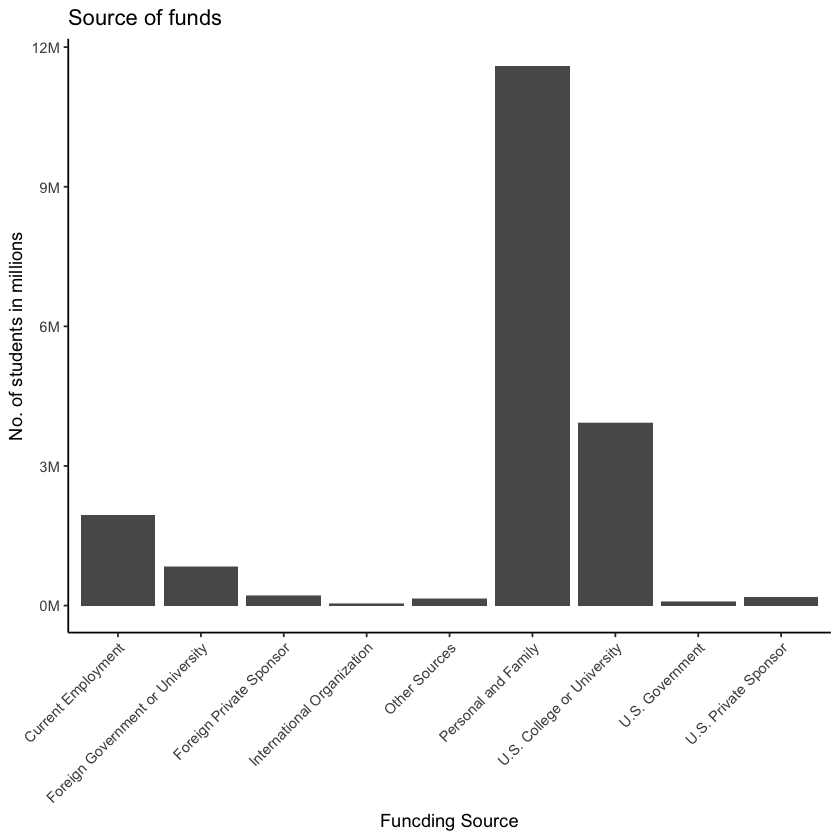

In [40]:
source_of_funds %>%
  
  ggplot(aes(source_of_fund , students / 1000000)) +
  
  geom_bar(stat = "identity") +
  
  labs(title = "Source of funds" , 
       
       x = "Funcding Source" , 
       
       y = "No. of students in millions") +
  
  scale_y_continuous(labels = function(x) paste0(x ,"M")) +
  
  theme_classic() +
  
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

In [ ]:
##### As clearly evident the majority students use Personal and Family funds to pay for there university education and this underscores the importance of having strong financial background in order to get access to university education. 
##### The relatively small contribution from universities implies that institutional financial aid or scholarships might not be the primary means of supporting students. 
##### This could indicate a need for increased efforts in providing financial assistance from the university's end. 
##### The substantial contribution from employers suggests that a notable number of students are engaged in work-study programs or receive financial support from their employers. 
##### This could indicate a strong connection between education and employment, with employers investing in the education of their workforce. 
##### Policymakers could use this information to assess the effectiveness of existing financial aid policies and explore opportunities to enhance support for students, especially in terms of reducing the burden on personal family income.

`summarise()` has grouped output by 'year'. You can override using the
`.groups` argument.


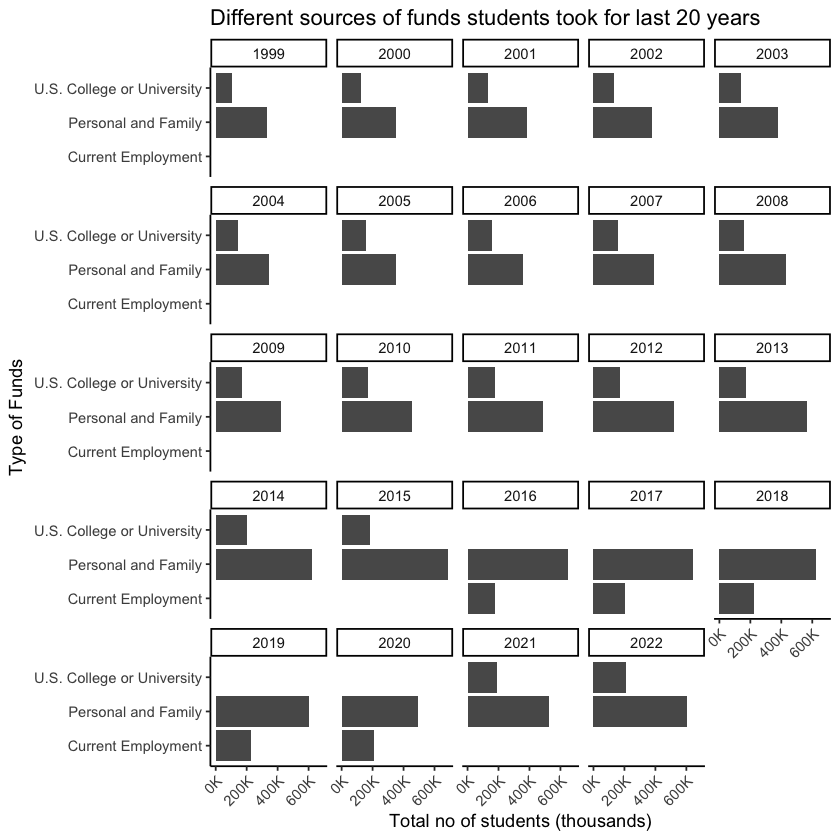

In [42]:
#view(source_of_funds)

 
source_of_funds %>%
  
  group_by(year , source_of_fund ) %>%
  
  summarise(total = sum(students)) %>%
  
  #arrange(desc(total))
  
  slice_max(order_by = total , n = 2) %>%
  
  
  ggplot(aes( total/1000 ,source_of_fund )) +
  
  
  scale_x_continuous(labels = function(x) paste0(x , "K")) +
  
  facet_wrap(~year) +
  
  geom_bar(stat = "identity") +
  
  theme_classic() +
  
  theme(axis.text.x = element_text(angle = 45 , hjust = 1)) +
  
  labs( title = "Different sources of funds students took for last 20 years" , 
        
        x = "Total no of students (thousands)" , 
        
        y = "Type of Funds")


In [43]:

##### From 1999-2015 most of the students got funds from there family followed by there college or university. 
##### However, after 2015 a strange pattern is revelaed where Universities have stopped funding for student loans and people are taking loans from there Current Employment.


In [44]:
#### Visualizing trend over time.

source_of_funds %>%
  
  group_by(year , source_of_fund ) %>%
  
  summarise(total = sum(students)) %>%
  
  #arrange(desc(total))
  
  slice_max(order_by = total , n = 2) %>%
  
  
  ggplot(aes( total/1000 ,source_of_fund )) +
  
  
  scale_x_continuous(labels = function(x) paste0(x , "K")) +
  
  #facet_wrap(~year) +
  
  transition_time(year) +
  
  geom_bar(stat = "identity") +
  
  theme_classic() +
  
  theme(axis.text.x = element_text(angle = 45 , hjust = 1)) +
  

labs(title = 'Year: {frame_time}', x = 'Total Students', y = 'Field of Study') +
  transition_time(year) +
  ease_aes('linear')

`summarise()` has grouped output by 'year'. You can override using the
`.groups` argument.

Rendering [===>-----------------------------------------] at 36 fps ~ eta:  3s

Rendering [===>-----------------------------------------] at 35 fps ~ eta:  3s

Rendering [====>----------------------------------------] at 35 fps ~ eta:  3s

Rendering [====>----------------------------------------] at 36 fps ~ eta:  2s

Rendering [=====>---------------------------------------] at 36 fps ~ eta:  2s

Rendering [=====>---------------------------------------] at 35 fps ~ eta:  2s

Rendering [======>--------------------------------------] at 35 fps ~ eta:  2s

Rendering [=======>-------------------------------------] at 35 fps ~ eta:  2s

Rendering [========>------------------------------------] at 35 fps ~ eta:  2s

Rendering [=========>-----------------------------------] at 36 fps ~ eta:  2s

Rendering [=========>-----------------------------------] at 35 fps ~ eta:  2s

Rendering [==========>------

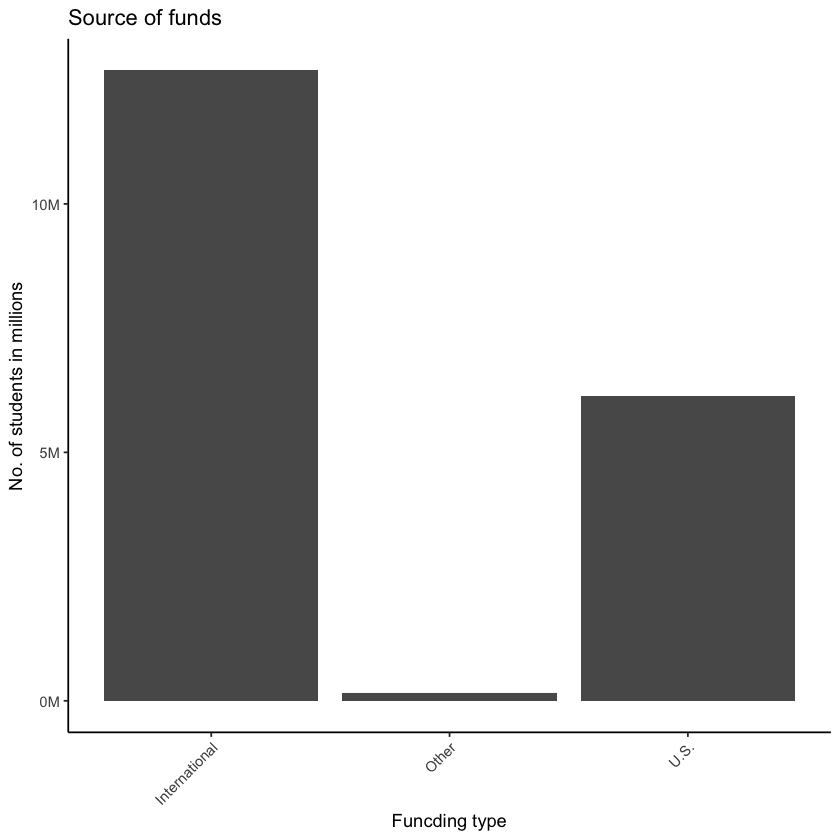

In [45]:
source_of_funds %>%
  
  ggplot(aes(source_type , students / 1000000)) +
  
  geom_bar(stat = "identity") +
  
  labs(title = "Source of funds" , 
       
       x = "Funcding type" , 
       
       y = "No. of students in millions") +
  
  scale_y_continuous(labels = function(x) paste0(x ,"M")) +
  
  theme_classic() +
  
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

In [46]:
##### This reveals that most of the students who are taking Funds for there education are international students.


In [47]:
visa_status <- read_csv("/Users/sharadraina/Desktop/archive/Project_01/status.csv" , show_col_types = FALSE)

patt4 = "/" %R%  DGT %R%  DGT
  
   visa_status$year  <-str_replace(visa_status$year  , pattern = patt , replacement = "")

   
   visa_status$year <-  year(as.Date(visa_status$year , format = "%Y"))

head(visa_status)

year,female,male,single,married,full_time,part_time,visa_f,visa_j,visa_other
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2007,278841,344964,543958,79847,575772,48033,552691,31814,39300
2008,304242,367374,591694,79922,613185,58431,589007,39625,42984
2009,309534,381389,615612,75311,637722,53201,612158,38692,40073
2010,322582,400695,653842,69435,669031,54246,645163,40504,37610
2011,338671,425824,690339,74156,714038,50457,688810,42047,33638
2012,363922,455722,744237,75407,769646,49998,747515,42621,29508


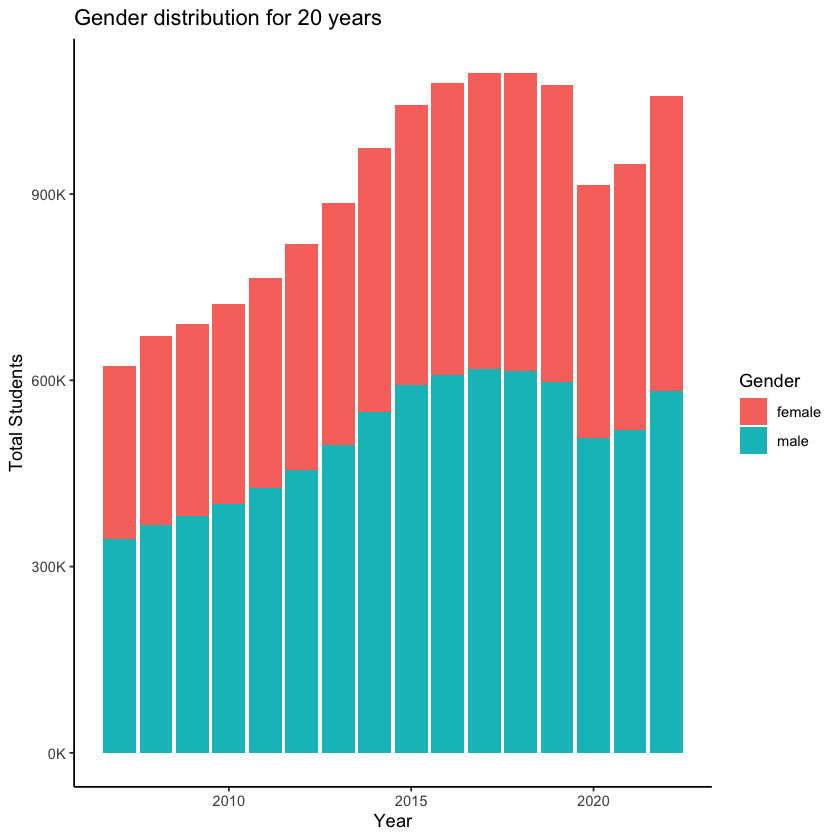

In [48]:
visa_status %>%
  
  pivot_longer(cols = c("male" , "female") , names_to = "Gender" , values_to = "Number") %>%
  
  ggplot(aes(year , Number /1000  , fill = Gender)) +
  
  scale_y_continuous(labels = function(x)  paste0(x , "K")) + 
  
  labs(title = "Gender distribution for 20 years" , 
       
       x = "Year" , 
       
       y = "Total Students") + 
   
  #facet_wrap(~year) +
  
   theme_classic()+
  
  geom_bar(stat = "identity")

In [49]:
##### Number of males coming to U.S universities has always been the highest.


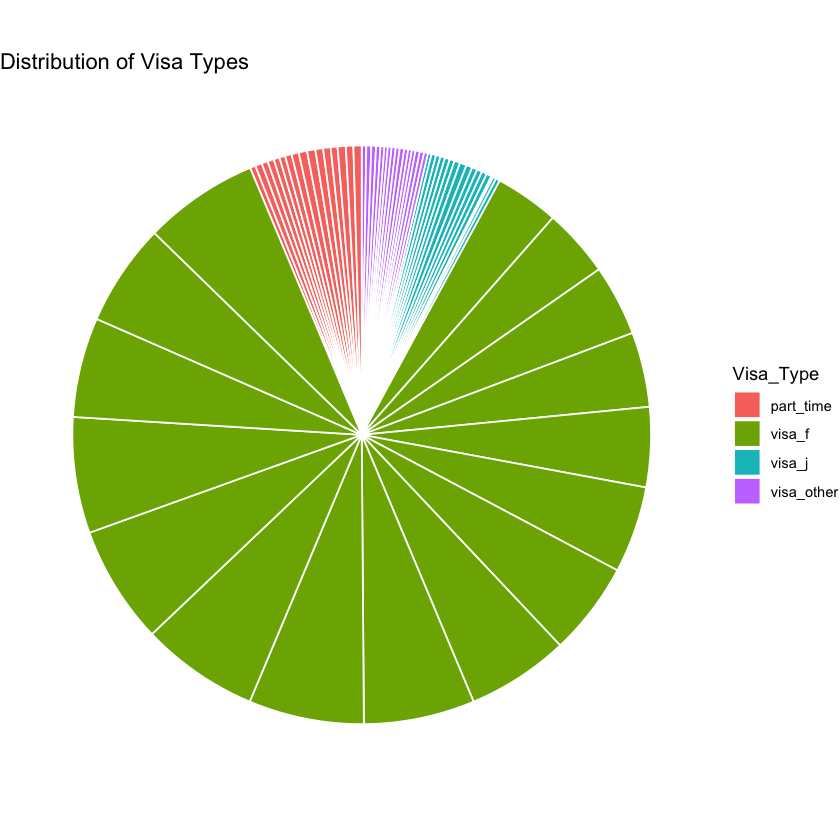

In [50]:
#### Visa wise student distribution.


 library(ggplot2)

vs <- visa_status %>%
  pivot_longer(cols = c("part_time", "visa_f", "visa_j", "visa_other"),
               names_to = "Visa_Type", values_to = "Value")

ggplot(vs, aes(x = "", y = Value, fill = Visa_Type)) +
  
  geom_bar(stat = "identity", width = 1, color = "white") +
  
  coord_polar(theta = "y") +
  
  theme_void() +
  
  labs(title = "Distribution of Visa Types")


In [51]:
##### Most of the visa types belong to F1 indicating that majority are students who have come here for education.
